In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import ast
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from itertools import combinations

import string as s
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import string

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/covid19_tweets.csv', encoding='latin1')
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,áá¥â»Õ¬ê Ï®,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile ðºð¸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,ðï¸Official Twitter handle of Department o...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH â³,ð¨ð¦ Canada,âï¸ The Architects of Free Trade âï¸ Rea...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


In [ ]:
df.dropna(subset=['hashtags'], inplace=True)
df['hashtags'] = df['hashtags'].apply(ast.literal_eval)

In [ ]:
def preprocess_text(text):
    text = ' '.join(text)
    # Tokenization
    lst = text.split()
    # Lowercasing
    lst = [text.lower() for text in lst]
    # Remove punctuations
    lst = [text.translate(str.maketrans("", "", string.punctuation)) for text in lst]
    # Remove numbers
    lst = [''.join([i for i in s if not i.isdigit()]) for s in lst]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_data = []
    for text in lst:
        word_tokens = word_tokenize(text)
        filtered_text = [word.lower() for word in word_tokens if word.lower() not in stop_words]
        if filtered_text:
            filtered_data.append(' '.join(filtered_text))
    # Lemmatization
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lst = [' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]) for text in filtered_data]
    return lst

In [ ]:
sampled_df = df.sample(frac=0.005, random_state=42)

In [ ]:
sampled_df['hashtags'] = sampled_df['hashtags'].apply(preprocess_text)
print(sampled_df['hashtags'])

124351     [km, running, thursdaykilos, sb, dailykilos]
63986                         [mass, adoration, rosary]
65681                                  [avocado, covid]
86890                              [coronavirus, covid]
161255                        [breaking, covid, odisha]
                              ...                      
11980             [usps, savethepostoffice, votebymail]
85246     [covid, coronavirus, coronavirusindia, covid]
23345                                           [covid]
123950                            [cyprus, coronavirus]
30709                                      [technology]
Name: hashtags, Length: 639, dtype: object


In [ ]:
# Membuat daftar edge
edges = []
for hashtags in sampled_df['hashtags']:
    edges.extend(combinations(hashtags, 2))  # Menghasilkan kombinasi dua hashtag yang muncul bersama


In [ ]:
edges

[('km', 'running'),
 ('km', 'thursdaykilos'),
 ('km', 'sb'),
 ('km', 'dailykilos'),
 ('running', 'thursdaykilos'),
 ('running', 'sb'),
 ('running', 'dailykilos'),
 ('thursdaykilos', 'sb'),
 ('thursdaykilos', 'dailykilos'),
 ('sb', 'dailykilos'),
 ('mass', 'adoration'),
 ('mass', 'rosary'),
 ('adoration', 'rosary'),
 ('avocado', 'covid'),
 ('coronavirus', 'covid'),
 ('breaking', 'covid'),
 ('breaking', 'odisha'),
 ('covid', 'odisha'),
 ('volunteer', 'sharjah'),
 ('volunteer', 'health'),
 ('volunteer', 'centre'),
 ('volunteer', 'world'),
 ('volunteer', 'covid'),
 ('volunteer', 'vaccine'),
 ('sharjah', 'health'),
 ('sharjah', 'centre'),
 ('sharjah', 'world'),
 ('sharjah', 'covid'),
 ('sharjah', 'vaccine'),
 ('health', 'centre'),
 ('health', 'world'),
 ('health', 'covid'),
 ('health', 'vaccine'),
 ('centre', 'world'),
 ('centre', 'covid'),
 ('centre', 'vaccine'),
 ('world', 'covid'),
 ('world', 'vaccine'),
 ('covid', 'vaccine'),
 ('sambitpatra', 'covid'),
 ('covid', 'biden'),
 ('covid', 'o

In [ ]:
edges_df = pd.DataFrame(edges, columns=['hashtag_1', 'hashtag_2'])
edges_df

,hashtag_1,hashtag_2
0,km,running
1,km,thursdaykilos
2,km,sb
3,km,dailykilos
4,running,thursdaykilos
...,...,...
1457,covid,covid
1458,coronavirus,coronavirusindia
1459,coronavirus,covid
1460,coronavirusindia,covid


In [ ]:
edges_df["value"] = 1
edges_df = edges_df.groupby(["hashtag_1","hashtag_2"], sort=False, as_index=False).sum()
edges_df

,hashtag_1,hashtag_2,value
0,km,running,1
1,km,thursdaykilos,1
2,km,sb,1
3,km,dailykilos,1
4,running,thursdaykilos,1
...,...,...,...
1298,savethepostoffice,votebymail,1
1299,covid,coronavirusindia,1
1300,coronavirus,coronavirusindia,1
1301,coronavirusindia,covid,1


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 151 (\x97) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 139 (\x8b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.pri

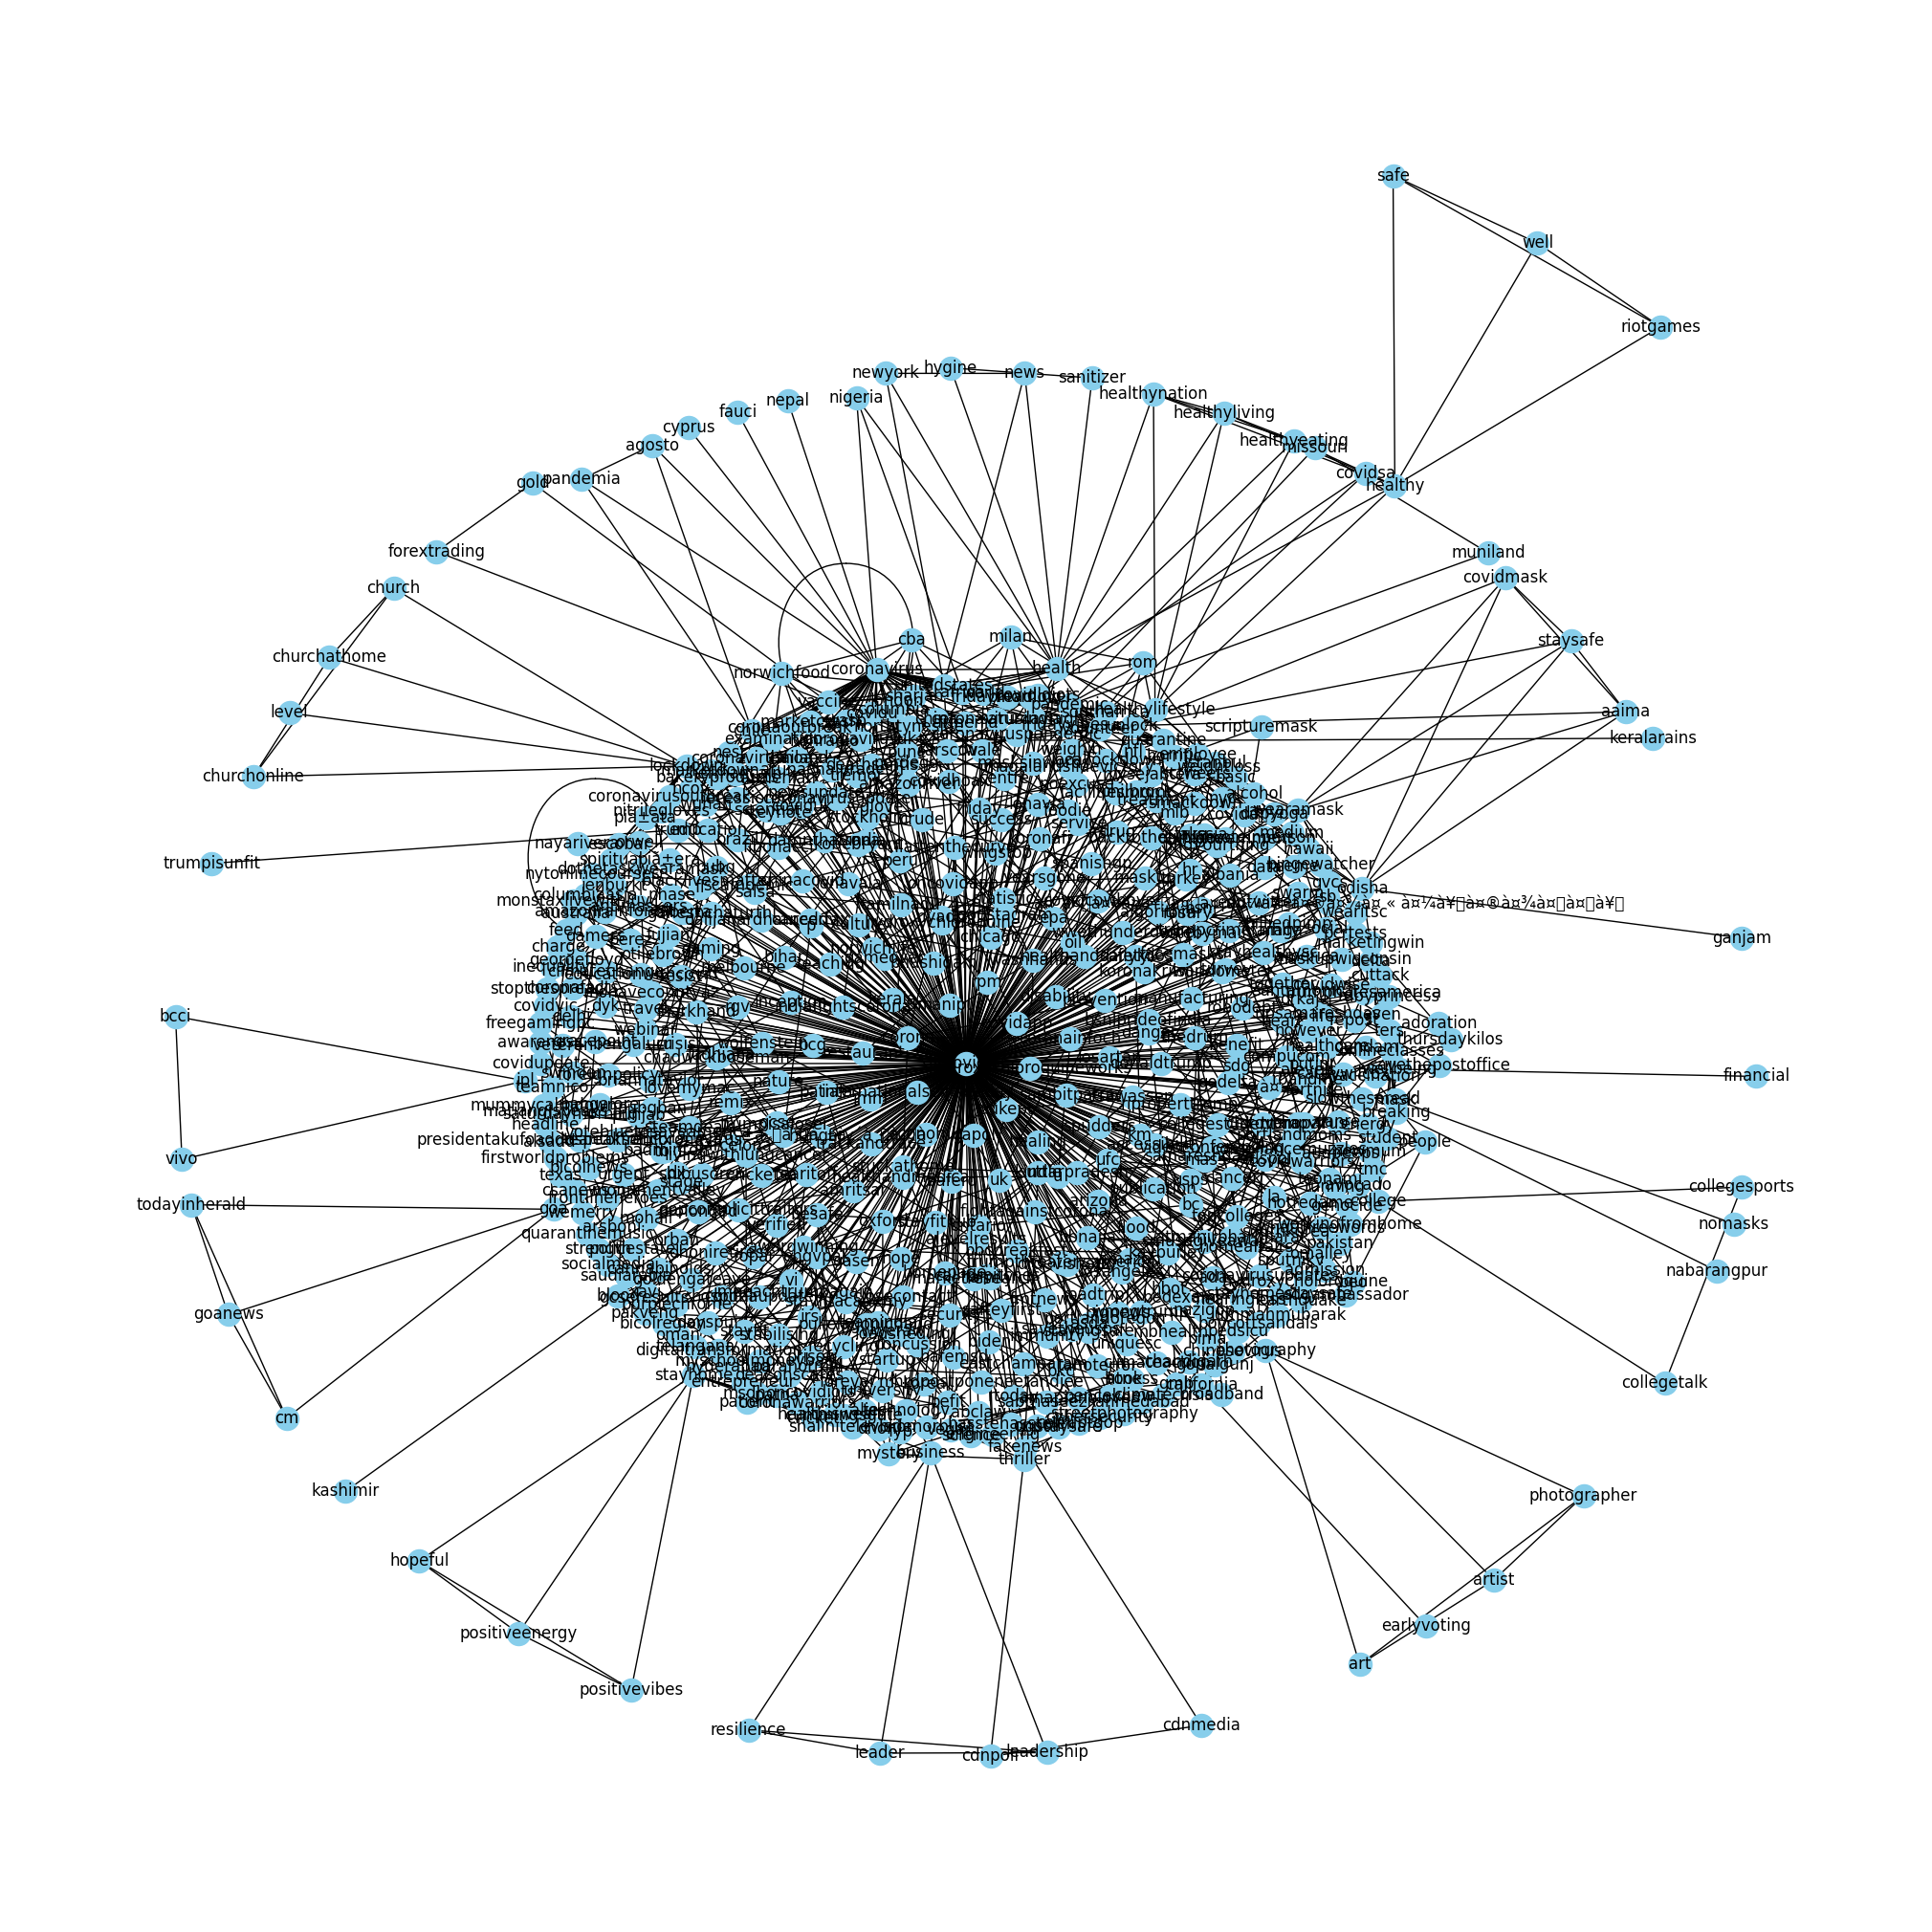

In [ ]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(edges_df,
                            source = "hashtag_1",
                            target = "hashtag_2",
                            edge_attr = "value",
                            create_using = nx.Graph())

plt.figure(figsize=(20,20))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()


Degree centrality untuk sebuah node dalam graf tidak berarah adalah jumlah koneksi yang dimiliki node tersebut, dibagi dengan jumlah node lain dalam graf. Ini menghasilkan nilai antara 0 dan 1.0.7383333333333334: Ini menunjukkan bahwa node covid memiliki degree centrality sekitar 0.738. Dalam arti praktis, ini berarti node covid terhubung langsung dengan sekitar 73.8% dari node lain dalam jaringan tersebut.

Betweenness Centrality mengukur seberapa sering sebuah node muncul pada jalur terpendek (shortest paths) antara dua node lainnya dalam jaringan. Ini berarti node tersebut bertindak sebagai "jembatan" atau perantara yang menghubungkan berbagai bagian dari jaringan. Nilai betweenness centrality untuk node covid adalah 0.6661369478230917, yang berarti bahwa node covid sering berada di jalur terpendek antara node lain dalam jaringan.

Eigenvector Centrality mengukur pengaruh sebuah node dalam jaringan dengan mempertimbangkan jumlah dan kualitas koneksi yang dimilikinya. Node yang terhubung dengan node-node lain yang berpengaruh akan memiliki eigenvector centrality yang tinggi.Nilai eigenvector centrality untuk node covid adalah 0.6830598533738335, yang berarti bahwa node covid tidak hanya memiliki banyak koneksi tetapi juga terhubung dengan node-node lain yang juga memiliki pengaruh atau koneksi yang signifikan.

In [ ]:
# Mengukur Degree Centrality
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:")
print(degree_centrality)

# Mengukur Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
print("\nBetweenness Centrality:")
print(betweenness_centrality)

# Mengukur Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
print("\nEigenvector Centrality:")
print(eigenvector_centrality)

Degree Centrality:
{'km': 0.006666666666666667, 'running': 0.006666666666666667, 'thursdaykilos': 0.006666666666666667, 'sb': 0.006666666666666667, 'dailykilos': 0.006666666666666667, 'mass': 0.0033333333333333335, 'adoration': 0.0033333333333333335, 'rosary': 0.0033333333333333335, 'avocado': 0.0016666666666666668, 'covid': 0.7383333333333334, 'coronavirus': 0.1, 'breaking': 0.011666666666666667, 'odisha': 0.015000000000000001, 'volunteer': 0.01, 'sharjah': 0.01, 'health': 0.03166666666666667, 'centre': 0.01, 'world': 0.01, 'vaccine': 0.013333333333333334, 'sambitpatra': 0.0016666666666666668, 'biden': 0.005, 'southafrica': 0.006666666666666667, 'auspol': 0.018333333333333333, 'rubyprincess': 0.006666666666666667, 'robodebt': 0.006666666666666667, 'coronaviruspandemic': 0.005, 'notredame': 0.0016666666666666668, 'mask': 0.006666666666666667, 'nomasks': 0.0016666666666666668, 'fortnite': 0.0016666666666666668, 'newmum': 0.0016666666666666668, 'rbandme': 0.0016666666666666668, 'findyour

In [ ]:
top_n = 10

top_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:top_n]
top_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:top_n]
top_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:top_n]

print(f"\nTop {top_n} Degree Centrality:")
for node, centrality in top_degree_centrality:
    print(f"{node}: {centrality}")

print(f"\nTop {top_n} Betweenness Centrality:")
for node, centrality in top_betweenness_centrality:
    print(f"{node}: {centrality}")

print(f"\nTop {top_n} Eigenvector Centrality:")
for node, centrality in top_eigenvector_centrality:
    print(f"{node}: {centrality}")


Top 10 Degree Centrality:
covid: 0.7383333333333334
coronavirus: 0.1
health: 0.03166666666666667
lockdown: 0.02666666666666667
pandemic: 0.023333333333333334
stayhome: 0.021666666666666667
quarantine: 0.02
auspol: 0.018333333333333333
wearamask: 0.018333333333333333
china: 0.018333333333333333

Top 10 Betweenness Centrality:
covid: 0.6661369478230917
health: 0.01953206402204722
coronavirus: 0.018977873174868067
lockdown: 0.011221109256167686
healthylifestyle: 0.008822574661472824
stayhome: 0.008269337785197551
healthy: 0.008230383973288813
goa: 0.008230383973288813
business: 0.008230383973288813
photography: 0.008230383973288813

Top 10 Eigenvector Centrality:
covid: 0.6830598533738335
coronavirus: 0.12364445130812163
lockdown: 0.051687204492157385
china: 0.05097333104032404
quarantine: 0.050061562216447836
pandemic: 0.049813126143062825
health: 0.04956237162481886
fridayvibes: 0.047316208172178374
stayhome: 0.04568893163380343
pune: 0.04536568039440001


In [ ]:
from pyvis.network import Network
from itertools import combinations
from IPython.display import display, HTML
net = Network(notebook=True, width='1000px', height='700px', bgcolor='#222222', font_color='white', cdn_resources='in_line')

node_degree = dict(G.degree)
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)

net.set_options("""
var options = {
  "physics": {
    "enabled": true,
    "barnesHut": {
      "gravitationalConstant": -20000,
      "centralGravity": 0.3,
      "springLength": 95,
      "springConstant": 0.04,
      "damping": 0.09
    },
    "minVelocity": 0.75
  }
}
""")

html_file = 'Covid.html'
net.show(html_file)
with open(html_file, 'r') as file:
    html_content = file.read()

display(HTML(html_content))

Covid.html
